# HW3: Fully-Connected Neural Networks 연습문제

***참고: 지난 과제2 및 이번 과제3 모두 Stanford 대학 cs231n 수업의 자료를 기반으로 함***
***http://cs231n.stanford.edu/***

이번 과제에서는 모든 neuron이 이전 layer의 모든 출력 원소를 입력으로 받는 fully-connected network을 구현함. 
이때 network의 연산을 강의동영상에서 설명한 computational graph의 개념에 기반을 둔 모듈형 연산 과정 별로 개념화하여, 각 layer마다 `forward` 및 `backward` 함수를 구현함.

* `layer_forward` 함수에서는 아래와 같이 input, weight, 및 기타 parameter를 함수의 입력인자로 받고, output 및 `backward`에서 필요한 정보를 저장하는 `cache` 객체를 반환함:

```python
def layer_forward(x, w):
  """ Receive inputs x and weights w """
  # Do some computations ...
  z = # ... some intermediate value
  # Do some more computations ...
  out = # the output
   
  cache = (x, w, z, out) # Values we need to compute gradients
   
  return out, cache
```

* `layer_backward` 함수에서는 아래와 같이 upstream derivative들과, `cache` 객체를 함수의 입력인자로 받고, input들과 weight들에 대한 gradient를 반환함:

```python
def layer_backward(dout, cache):
  """
  Receive dout (derivative of loss with respect to outputs) and cache,
  and compute derivative with respect to inputs.
  """
  # Unpack cache values
  x, w, z, out = cache
  
  # Use values in cache to compute derivatives
  dx = # Derivative of loss with respect to x
  dw = # Derivative of loss with respect to w
  
  return dx, dw
```

이와 같은 방식으로 다양한 layer들에 대한 연산을 구현하고 나면, 이들을 손쉽게 조합하여 다양한 구조를 갖는 classifier들을 생성할 수 있음. 

### 셀1: 환경 설정

필요한 패키지 임포트, 그래프plot 크기 설정, 영상 config 설정 등 수행하며, 별도의 코딩 없이 수행만 시키면 됨.

In [1]:
# As usual, a bit of setup
from __future__ import print_function
import time
import numpy as np
import matplotlib.pyplot as plt
from intro2ai.classifiers.fc_net import *
from intro2ai.data_utils import get_CIFAR10_data
from intro2ai.gradient_check import eval_numerical_gradient, eval_numerical_gradient_array
from intro2ai.solver import Solver

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

### 셀2: CIFAR-10 Data Loading and Preprocessing

다음 셀에서는 모두 데이터 불러오기 및 전처리 등을 수행하며, 역시 별도의 코딩 없이 수행만 시키면 됨.

In [2]:
# Load the (preprocessed) CIFAR10 data.
data = get_CIFAR10_data()
for k, v in list(data.items()):
  print(('%s: ' % k, v.shape))

('X_train: ', (49000, 3, 32, 32))
('y_train: ', (49000,))
('X_val: ', (1000, 3, 32, 32))
('y_val: ', (1000,))
('X_test: ', (1000, 3, 32, 32))
('y_test: ', (1000,))


## 셀3-7: 모듈형 Layer 연산 별 forward/backward 함수 구현

### 구현문제1: Linear (affine) layer forward 함수 구현 & 셀3: 유효성 확인

**구현문제1**: 파일 `intro2ai/layers.py`을 열어서 linear layer (행렬 곱셈 연산으로 Affine layer으로도 지칭)에 대한 `affine_forward` 함수를 구현하시오.

함수 구현을 완료한 후 다음 셀을 실행하여 구현한 함수의 유효성을 검증할 수 있음:

In [3]:
# Test the affine_forward function

num_inputs = 2
input_shape = (4, 5, 6)
output_dim = 3

input_size = num_inputs * np.prod(input_shape)
weight_size = output_dim * np.prod(input_shape)

x = np.linspace(-0.1, 0.5, num=input_size).reshape(num_inputs, *input_shape)
w = np.linspace(-0.2, 0.3, num=weight_size).reshape(np.prod(input_shape), output_dim)
b = np.linspace(-0.3, 0.1, num=output_dim)

out, _ = affine_forward(x, w, b)
correct_out = np.array([[ 1.49834967,  1.70660132,  1.91485297],
                        [ 3.25553199,  3.5141327,   3.77273342]])

# Compare your output with ours. The error should be around e-9 or less.
print('Testing affine_forward function:')
print('difference: ', rel_error(out, correct_out))

Testing affine_forward function:
difference:  9.769849468192957e-10


### 구현문제2: Linear (affine) layer backward 함수 구현 & 셀4: 유효성 확인

**구현문제2**: 파일 `intro2ai/layers.py`을 열어서 Affine layer에 대한 `affine_backward` 함수를 구현하시오. 

함수 구현 후 아래 셀을 실행하여 함수의 유효성을 검증함:

In [4]:
# Test the affine_backward function
np.random.seed(231)
x = np.random.randn(10, 2, 3)
w = np.random.randn(6, 5)
b = np.random.randn(5)
dout = np.random.randn(10, 5)

dx_num = eval_numerical_gradient_array(lambda x: affine_forward(x, w, b)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: affine_forward(x, w, b)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: affine_forward(x, w, b)[0], b, dout)

_, cache = affine_forward(x, w, b)
dx, dw, db = affine_backward(dout, cache)

# The error should be around e-10 or less
print('Testing affine_backward function:')
print('dx error: ', rel_error(dx_num, dx))
print('dw error: ', rel_error(dw_num, dw))
print('db error: ', rel_error(db_num, db))

Testing affine_backward function:
dx error:  5.399100368651805e-11
dw error:  9.904211865398145e-11
db error:  2.4122867568119087e-11


### 구현문제3: ReLU layer forward 함수 구현 & 셀5: 유효성 확인

**구현문제3**: 파일 `intro2ai/layers.py`을 열어서 ReLU layer에 대한 `relu_forward` 함수를 구현하시오. 

함수 구현 후 아래 셀을 실행하여 함수의 유효성을 검증함:

In [5]:
# Test the relu_forward function

x = np.linspace(-0.5, 0.5, num=12).reshape(3, 4)

out, _ = relu_forward(x)
correct_out = np.array([[ 0.,          0.,          0.,          0.,        ],
                        [ 0.,          0.,          0.04545455,  0.13636364,],
                        [ 0.22727273,  0.31818182,  0.40909091,  0.5,       ]])

# Compare your output with ours. The error should be on the order of e-8
print('Testing relu_forward function:')
print('difference: ', rel_error(out, correct_out))

Testing relu_forward function:
difference:  4.999999798022158e-08


### 구현문제4: ReLU layer backward 함수 구현 & 셀 6: 유효성 확인

**구현문제4**: 파일 `intro2ai/layers.py`을 열어서 ReLU layer에 대한 `relu_backward` 함수를 구현하시오. 

함수 구현 후 아래 셀을 실행하여 함수의 유효성을 검증함:

In [6]:
np.random.seed(231)
x = np.random.randn(10, 10)
dout = np.random.randn(*x.shape)

dx_num = eval_numerical_gradient_array(lambda x: relu_forward(x)[0], x, dout)

_, cache = relu_forward(x)
dx = relu_backward(dout, cache)

# The error should be on the order of e-12
print('Testing relu_backward function:')
print('dx error: ', rel_error(dx_num, dx))

Testing relu_backward function:
dx error:  3.2756349136310288e-12


### 서술문제1: 

본 과제에서 구현하는 함수는 ReLU 함수뿐이지만, 이외에도 neural network에 적용 가능한 다양한 activation function들이 있으며 각각 장단점을 가짐. 이때 Activation function 별로 큰 문제가 될 수 있는 것이 backpropagation 과정 중 gradient 값이 0 또는 0에 매우 근접한 벡터 값으로 도출되는 것임. 다음 activation function들 중 이와 같은 문제가 발생하는 함수는 어떤 것들인가? 그리고 1차원 공간에 대해서만 고려할 때, 어떤 입력 값에 대해 zero gradient가 발생하겠는가? 
1. Sigmoid
2. ReLU
3. Leaky ReLU

### 답변:
1. Sigmoid - 절댓값이 너무 커질 떄 발생한다.
2. ReLU - 0보다 작은 숫자에서 일어난다.


### 셀7: "Sandwich" layers

Neural network를 구성할 때 반복적으로 자주 쓰이는 layer 구성 패턴이 있을 수 있음. 예를 들어 linear (affine) layer들은 흔히 바로 ReLU activation function layer로 이어짐. 이렇게 자주 등장하는 layer 패턴을 구현하기 편하게 하기 위해 `intro2ai/layer_utils.py` 파일에 이런 계층 구성을 구현하기 편하게 하는 함수들을 구현함.

해당 파일에 구현된 `affine_relu_forward`과 `affine_relu_backward` 함수를 살펴보고 아래 셀을 호출하여 각 함수의 유효성을 확인함.

In [7]:
from intro2ai.layer_utils import affine_relu_forward, affine_relu_backward
np.random.seed(231)
x = np.random.randn(2, 3, 4)
w = np.random.randn(12, 10)
b = np.random.randn(10)
dout = np.random.randn(2, 10)

out, cache = affine_relu_forward(x, w, b)
dx, dw, db = affine_relu_backward(dout, cache)

dx_num = eval_numerical_gradient_array(lambda x: affine_relu_forward(x, w, b)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: affine_relu_forward(x, w, b)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: affine_relu_forward(x, w, b)[0], b, dout)

# Relative error should be around e-10 or less
print('Testing affine_relu_forward and affine_relu_backward:')
print('dx error: ', rel_error(dx_num, dx))
print('dw error: ', rel_error(dw_num, dw))
print('db error: ', rel_error(db_num, db))

Testing affine_relu_forward and affine_relu_backward:
dx error:  2.299579177309368e-11
dw error:  8.162011105764925e-11
db error:  7.826724021458994e-12


## 셀 8-15: Network의 세부 config 설정, 학습, 및 최적화

### 구현문제5: Softmax and SVM Loss layer 구현 & 셀8: 유효성 확인

**구현문제5**: `intro2ai/layers.py` 파일 내 `softmax_loss` 및 `svm_loss` 함수에 각각 softmax 및 SVM의 loss 값과 gradient 벡터를 계산하는 코드를 구현하시오. 
구현할 코드는 지난 과제 2에서 파일 `softmax.py` 및 `linear_svm.py`에서 구현한 함수의 코드와 유사함.

아래의 셀을 실행하여 구현된 함수들이 유효한지 확인함:

In [8]:
np.random.seed(231)
num_classes, num_inputs = 10, 50
x = 0.001 * np.random.randn(num_inputs, num_classes)
y = np.random.randint(num_classes, size=num_inputs)

dx_num = eval_numerical_gradient(lambda x: svm_loss(x, y)[0], x, verbose=False)
loss, dx = svm_loss(x, y)

# Test svm_loss function. Loss should be around 9 and dx error should be around the order of e-9
print('Testing svm_loss:')
print('loss: ', loss)
print('dx error: ', rel_error(dx_num, dx))

dx_num = eval_numerical_gradient(lambda x: softmax_loss(x, y)[0], x, verbose=False)
loss, dx = softmax_loss(x, y)

# # Test softmax_loss function. Loss should be close to 2.3 and dx error should be around e-8
print('\nTesting softmax_loss:')
print('loss: ', loss)
print('dx error: ', rel_error(dx_num, dx))

Testing svm_loss:
loss:  8.999602749096233
dx error:  1.4021566006651672e-09

Testing softmax_loss:
loss:  2.3025458445007376
dx error:  8.234144091578429e-09


### 구현문제6: Two-layer network 구현 & 셀9: 유효성 확인

**구현문제6**: `intro2ai/classifiers/fc_net.py` 파일 내 `TwoLayerNet` class의 코드를 완성하시오. 
이때, 제공된 코드에 형성된 해당 class의 멤버 변수 및 멤버 함수 등 구조를 잘 읽고 이해한 후 구현을 시작하시오. 

구현 완료 후에 아래의 셀을 실행하여 구현된 함수들이 유효한지 확인함:

In [9]:
np.random.seed(231)
N, D, H, C = 3, 5, 50, 7
X = np.random.randn(N, D)
y = np.random.randint(C, size=N)

std = 1e-3
model = TwoLayerNet(input_dim=D, hidden_dim=H, num_classes=C, weight_scale=std)

print('Testing initialization ... ')
W1_std = abs(model.params['W1'].std() - std)
b1 = model.params['b1']
W2_std = abs(model.params['W2'].std() - std)
b2 = model.params['b2']
assert W1_std < std / 10, 'First layer weights do not seem right'
assert np.all(b1 == 0), 'First layer biases do not seem right'
assert W2_std < std / 10, 'Second layer weights do not seem right'
assert np.all(b2 == 0), 'Second layer biases do not seem right'

print('Testing test-time forward pass ... ')
model.params['W1'] = np.linspace(-0.7, 0.3, num=D*H).reshape(D, H)
model.params['b1'] = np.linspace(-0.1, 0.9, num=H)
model.params['W2'] = np.linspace(-0.3, 0.4, num=H*C).reshape(H, C)
model.params['b2'] = np.linspace(-0.9, 0.1, num=C)
X = np.linspace(-5.5, 4.5, num=N*D).reshape(D, N).T
scores = model.loss(X)
correct_scores = np.asarray(
  [[11.53165108,  12.2917344,   13.05181771,  13.81190102,  14.57198434, 15.33206765,  16.09215096],
   [12.05769098,  12.74614105,  13.43459113,  14.1230412,   14.81149128, 15.49994135,  16.18839143],
   [12.58373087,  13.20054771,  13.81736455,  14.43418138,  15.05099822, 15.66781506,  16.2846319 ]])
scores_diff = np.abs(scores - correct_scores).sum()
print(scores_diff)
assert scores_diff < 1e-6, 'Problem with test-time forward pass'

print('Testing training loss (no regularization)')
y = np.asarray([0, 5, 1])
loss, grads = model.loss(X, y)
correct_loss = 3.4702243556
assert abs(loss - correct_loss) < 1e-10, 'Problem with training-time loss'

model.reg = 1.0
loss, grads = model.loss(X, y)
correct_loss = 26.5948426952
print(loss)
assert abs(loss - correct_loss) < 1e-10, 'Problem with regularization loss'

# Errors should be around e-7 or less
for reg in [0.0, 0.7]:
  print('Running numeric gradient check with reg = ', reg)
  model.reg = reg
  loss, grads = model.loss(X, y)

  for name in sorted(grads):
    f = lambda _: model.loss(X, y)[0]
    grad_num = eval_numerical_gradient(f, model.params[name], verbose=False)
    print('%s relative error: %.2e' % (name, rel_error(grad_num, grads[name])))

Testing initialization ... 
Testing test-time forward pass ... 
5.115852452775016e-08
Testing training loss (no regularization)
26.594842695238583
Running numeric gradient check with reg =  0.0
W1 relative error: 1.83e-08
W2 relative error: 3.20e-10
b1 relative error: 9.83e-09
b2 relative error: 4.33e-10
Running numeric gradient check with reg =  0.7
W1 relative error: 2.53e-07
W2 relative error: 2.85e-08
b1 relative error: 1.56e-08
b2 relative error: 9.09e-10


### 구현문제7 & 셀10: SGD 구현 및 실행

**구현문제7**: `intro2ai/solver.py` 파일 내의 코드를 자세히 읽고, Solver class의 구조를 자세히 파악한 후, `intro2ai/optim.py` 파일 내 `sgd` function을 구현하고, 아래 셀에 `Solver` class의 객체를 통해 `TwoLayerNet`이 학습되도록 코드를 구현하시오. 

구현이 모두 유효할 경우 학습된 `TwoLayerNet`은 validation set에 대해 약 `36%`의 accuracy를 보임.

In [10]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
model = TwoLayerNet(input_size, hidden_size, num_classes)
solver = None

##############################################################################
# TODO: Use a Solver instance to train a TwoLayerNet that achieves about 36% #
# accuracy on the validation set.                                            #
##############################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

solver = Solver(model,
                data,
                update_rule = 'sgd',
                optim_config={
                      'learning_rate': 1e-3,
                    },
                lr_decay=0.95,
                num_epochs=20,
                batch_size=100,
                print_every=500
                )

solver.train()


# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

(Iteration 1 / 9800) loss: 2.300089
(Epoch 0 / 20) train acc: 0.171000; val_acc: 0.170000
(Epoch 1 / 20) train acc: 0.399000; val_acc: 0.428000
(Iteration 501 / 9800) loss: 1.711237
(Epoch 2 / 20) train acc: 0.463000; val_acc: 0.443000
(Iteration 1001 / 9800) loss: 1.340071
(Epoch 3 / 20) train acc: 0.477000; val_acc: 0.430000
(Iteration 1501 / 9800) loss: 1.337133
(Epoch 4 / 20) train acc: 0.497000; val_acc: 0.467000
(Iteration 2001 / 9800) loss: 1.422221
(Epoch 5 / 20) train acc: 0.508000; val_acc: 0.483000
(Iteration 2501 / 9800) loss: 1.243567
(Epoch 6 / 20) train acc: 0.533000; val_acc: 0.492000
(Iteration 3001 / 9800) loss: 1.264002
(Epoch 7 / 20) train acc: 0.545000; val_acc: 0.489000
(Iteration 3501 / 9800) loss: 1.446003
(Epoch 8 / 20) train acc: 0.546000; val_acc: 0.474000
(Iteration 4001 / 9800) loss: 1.187435
(Epoch 9 / 20) train acc: 0.586000; val_acc: 0.486000
(Iteration 4501 / 9800) loss: 1.306174
(Epoch 10 / 20) train acc: 0.545000; val_acc: 0.483000
(Iteration 5001 / 9

### 셀11-12: training 과정의 ***debugging***

위에서 언급된 것처럼 제공된 기본 parameter를 활용할 경우 validation accuracy 약 0.36으로 썩 좋지 않은 결과가 도출됨.

왜 이런 결과가 도출되는지를 확인하는 하나의 방법은 SGD 최적화 과정에서 training 및 validation set들에 대한 loss function 값들을 그래프로 그려서 추세를 확인하는 것임. 아래 셀11은 이에 대한 코드임.

또다른 방법은 network의 첫 layer에서 학습된 weight 들을 visualize하여 첫 layer의 neuron들이 어떤 패턴에 반응하는지를 확인하는 것임. 영상 등 시각적인 데이터에 학습된 대부분의 neural network에서 first layer weight 값들은 대체로 시각적으로 확인 가능한 특정한 구조를 보임. 아래 셀12은 이에 대한 코드임.

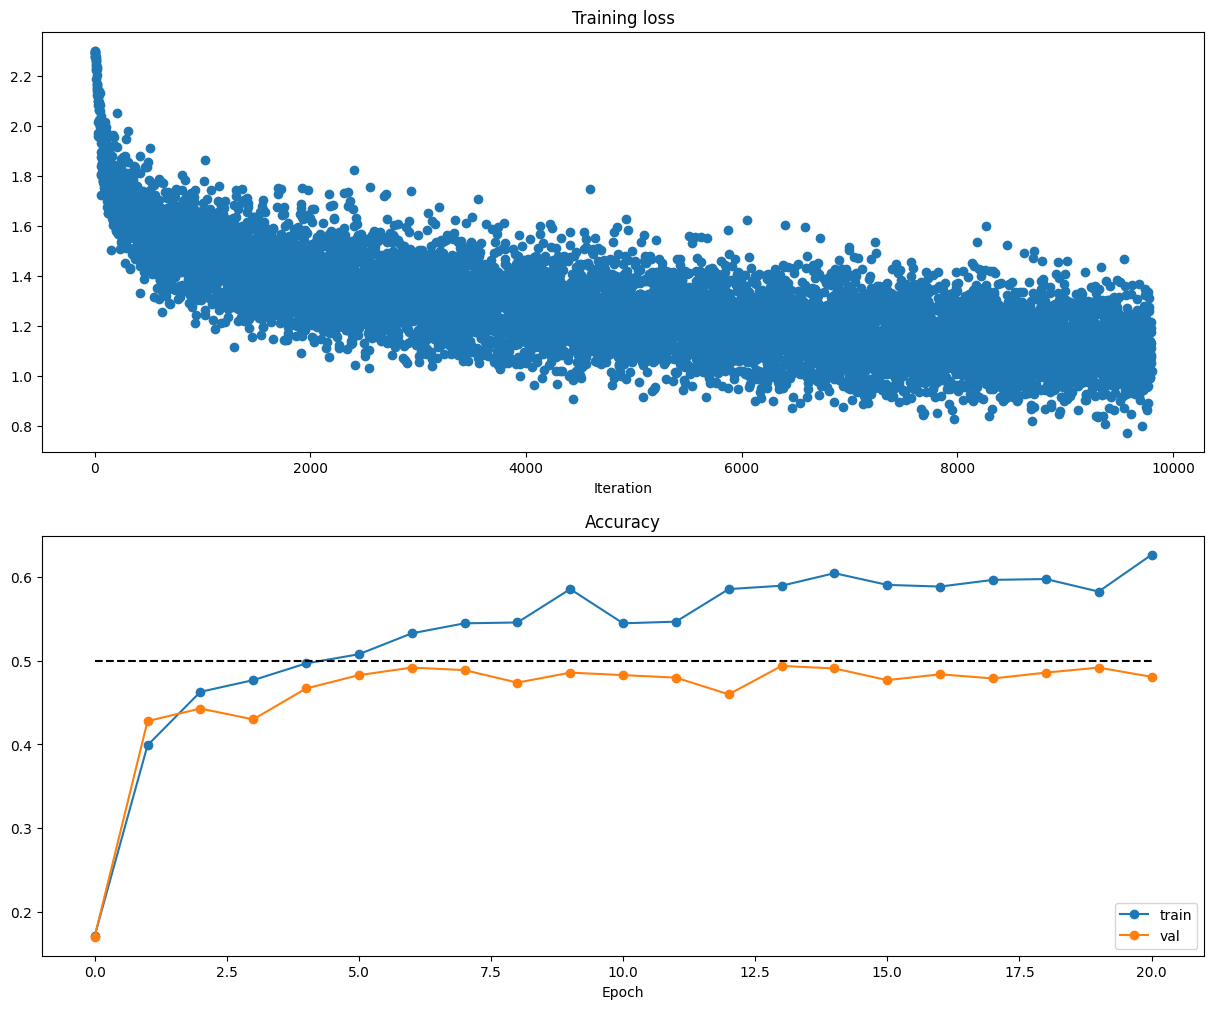

In [11]:
# Run this cell to visualize training loss and train / val accuracy

plt.subplot(2, 1, 1)
plt.title('Training loss')
plt.plot(solver.loss_history, 'o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(solver.train_acc_history, '-o', label='train')
plt.plot(solver.val_acc_history, '-o', label='val')
plt.plot([0.5] * len(solver.val_acc_history), 'k--')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()

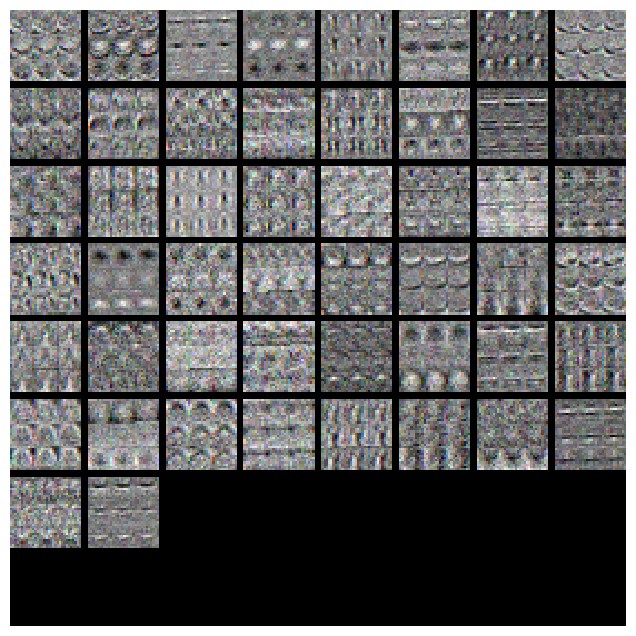

In [33]:
from intro2ai.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(model)

### 셀13: Hyperparameter tuning

**문제가 무엇인가?**. 위의 visualization 결과들을 통해 우리는 loss가 대략 직선형으로 감소하고 있으며, 이런 경우는 learning rate이 너무 작을 때 발생할 수 있음을 알 수 있음. 뿐만 아니라 training 및 validation accuracy 사이에 격차가 거의 없는 것을 통해 우리가 학습 중인 모델의 capacity가 낮기 때문에 크기를 키워야 한다는 것을 알 수 있음. 만약 모델이 아주 컸다면 우리는 overfitting이 발생하는 경향을 볼 수 있었을 것이며 이는 training 및 validation accuracy 사이에 큰 격차를 가져왔을 것임.

**Tuning**. hyperparameter 값들이 최종 성능에 어떻게 영향을 미치는지에 대한 직관적으로 이해할 수 있도록 hyperparameter들을 tuning(튜닝, 미세조정) 하는 과정을 여러번 반복 수행하면서 연습하는 것은 Neural Networks을 효과적으로 활용하는데 반드시 필요한 과정임. 아래 셀13을 이용하여  hidden layer size, learning rate, numer of training epochs, 그리고 regularization strength 등 hyperparameter들에 다양한 값들을 입력할 때 결과가 달라지는지 확인할 수 있음. learning rate decay 값 또한 변경하는 것도 고려해 봐야 하지만, 기본 값으로도 상당히 좋은 결과를 얻을 수 있을 것임.

**실험**. validation set에 대해 분류 정확도 약 48% 이상 도출할 수 있을 것임. 문제 출제자의 실험 결과 최고 약 52% 이상의 정확도를 도출한 바 있음.

**실험**: 본 연습문제에서는 fully-connected Neural Network 모델을 이용하여 CIFAR-10 데이터셋에 대해 최대한 높은 분류 정확도를 도출하는 것이 목표임. 어느 정도의 tuning으로 validation set에 대해 분류 정확도 약 48% 이상 도출할 수 있을 것이며, 문제 출제자의 실험 결과 최고 약 52% 이상의 정확도를 도출한 바 있으니 이를 참고 수치로 설정할 수 있음.

In [30]:
model = TwoLayerNet(input_size, hidden_size, num_classes, reg = 0.7)
best_model = None


#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_model.                                                          #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on thexs previous exercises.                          #
#################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

solver = Solver(model,
                data,
                update_rule = 'sgd',
                optim_config={
                      'learning_rate': 1e-3,
                    },
                lr_decay=0.95,
                num_epochs=20,
                batch_size=100,
                print_every=500,
                )
solver.train()
best_model = solver.model
# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

(Iteration 1 / 9800) loss: 2.357719
(Epoch 0 / 20) train acc: 0.129000; val_acc: 0.123000
(Epoch 1 / 20) train acc: 0.410000; val_acc: 0.424000
(Iteration 501 / 9800) loss: 1.605799
(Epoch 2 / 20) train acc: 0.472000; val_acc: 0.478000
(Iteration 1001 / 9800) loss: 1.516575
(Epoch 3 / 20) train acc: 0.469000; val_acc: 0.480000
(Iteration 1501 / 9800) loss: 1.627062
(Epoch 4 / 20) train acc: 0.484000; val_acc: 0.447000
(Iteration 2001 / 9800) loss: 1.367628
(Epoch 5 / 20) train acc: 0.501000; val_acc: 0.447000
(Iteration 2501 / 9800) loss: 1.541888
(Epoch 6 / 20) train acc: 0.524000; val_acc: 0.468000
(Iteration 3001 / 9800) loss: 1.563997
(Epoch 7 / 20) train acc: 0.534000; val_acc: 0.480000
(Iteration 3501 / 9800) loss: 1.423344
(Epoch 8 / 20) train acc: 0.531000; val_acc: 0.498000
(Iteration 4001 / 9800) loss: 1.548237
(Epoch 9 / 20) train acc: 0.558000; val_acc: 0.485000
(Iteration 4501 / 9800) loss: 1.429634
(Epoch 10 / 20) train acc: 0.535000; val_acc: 0.491000
(Iteration 5001 / 9

### 셀14-15: Test your model!

가장 우수한 성능을 보이는 모델을 이용하여 validation 및 test set에 대한 분류 정확도를 도출하시오. 
최적화가 잘 수행되었을 경우 validation set 및 test set에 대해 약 `48%`의 accuracy를 얻을 수 있을 것임.

In [31]:
y_val_pred = np.argmax(best_model.loss(data['X_val']), axis=1)
print('Validation set accuracy: ', (y_val_pred == data['y_val']).mean())

Validation set accuracy:  0.523


In [32]:
y_test_pred = np.argmax(best_model.loss(data['X_test']), axis=1)
print('Test set accuracy: ', (y_test_pred == data['y_test']).mean())

Test set accuracy:  0.53


### 서술문제2: 

이제 neural network 분류기를 학습하였으나, test set에 대한 정확도가 training set에 대한 정확도보다 매우 낮은 것을 봤음. 이 격차를 어떻게 줄일 수 있는지, 아래 방법들 중 해당되는 방법을 모두 제시하고 그 이유를 설명하시오.

1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.

### 답변:
$\color{blue}{해당 항목:}$  
1,3

$\color{blue}{설명:}$  
test set에 정확도가 training set의 정확도 보다 낮다는 것은 overfitting 되었다는 뜻입니다.
1. 훈련 데이터를 더 늘린다는 뜻은, 더 많은 정보를 보고 판단하겠다는 뜻입니다.
  새로운 데이터를 넣거나 data augmentation을 적용하면 과적합을 방지할 수 있습니다.  
3. 정규화 상수를 증가시키면 함수의 모양이 더 단순해집니다. 이를 통해 과적합을 방지 할 수 있습니다
